# Statistical analysis with Statsmodels

## Sumary
In this work, we will use a rental dataset and the statsmodels package in Python to statistically analyze the data. We follow these steps:

1) To begin, we import all the packages we will use throughout this work.

2) We load the dataset.

3) After loading, we examine the dataset to verify that there are no missing values or that it is clean.

4) We perform an exploratory analysis (statistical summary).

5) Finally, we use some specific statistical techniques, such as:

a) Correlation coefficient, which is a statistical measure that indicates the strength and direction of the linear relationship between two numerical variables. It ranges from -1 to 1, where 1 indicates a perfect positive linear correlation and -1 indicates a perfect negative correlation. If it is 0, it means that there is a linear correlation between the variables.

b) Linear Regression, which is a statistical technique used to model the relationship between a dependent variable (also called the response variable or target variable) and one or more independent variables (also called explanatory or predictor variables). There are two types of linear regression: simple and multiple linear regression. However, in this work, we use simple linear regression, which is expressed as:

Y = a + bX + ε

Where Y is the dependent variable, X is the independent variable, a is the linear coefficient (intercept), b is the slope (inclination), and ε is the random error.

In [98]:
#Python Language Version
from platform import python_version
print('The Python version is: ', python_version())

The Python version is:  3.9.13


In [99]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import statsmodels.api as sms

### Load the dataset

In [100]:
#load dataset
dts = pd.read_csv('dataset.csv')

In [101]:
dts.shape

(3000, 7)

In [102]:
dts.columns

Index(['valor_aluguel', 'area_m2', 'ano_construcao', 'codigo_localidade',
       'numero_banheiros', 'numero_cozinhas', 'codigo_bairro'],
      dtype='object')

In [103]:
dts.head()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
0,120.97436,35,1939,1,0,0,1112
1,436.97433,104,1939,1,1,0,1112
2,355.74360,29,1971,2,0,0,2114
3,282.92310,39,1972,2,0,0,2148
4,807.23080,97,1985,1,0,0,2222


In [104]:
#Rename columns names
dts.rename(columns = {'valor_aluguel' : 'Rental_Price', 'area_m2': 'Area_m2', 'ano_construcao' : 'Year_of_construction',  
        'codigo_localidade' : 'Localization_Code', 'numero_banheiros' : 'Number_of_bathrooms',  
       'numero_cozinhas' : 'Number_of_Kitchens', 'codigo_bairro' : 'Region_Code'}, inplace = True)

In [105]:
dts.head()

,Rental_Price,Area_m2,Year_of_construction,Localization_Code,Number_of_bathrooms,Number_of_Kitchens,Region_Code
0,120.97436,35,1939,1,0,0,1112
1,436.97433,104,1939,1,1,0,1112
2,355.74360,29,1971,2,0,0,2114
3,282.92310,39,1972,2,0,0,2148
4,807.23080,97,1985,1,0,0,2222


In [ ]:
dts.info()

### Exploratory Analysis - Statistical Summary

In [55]:
#Check for missing values
dts.isna().sum()

Rental_Price            0
Area_m2                 0
Year_of_construction    0
Localization_Code       0
Number_of_bathrooms     0
Number_of_Kitchens      0
Region_Code             0
dtype: int64

In [56]:
#Statistical Summary
dts.describe()

,Rental_Price,Area_m2,Year_of_construction,Localization_Code,Number_of_bathrooms,Number_of_Kitchens,Region_Code
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,459.643146,67.363333,1956.321333,1.441000,0.061333,0.042000,1173.798667
std,195.865692,23.675758,22.288136,0.545238,0.239981,0.200623,678.187690
min,40.512820,20.000000,1918.000000,1.000000,0.000000,0.000000,113.000000
25%,320.961530,51.000000,1939.000000,1.000000,0.000000,0.000000,561.750000
50%,426.897435,65.000000,1959.000000,1.000000,0.000000,0.000000,1025.000000
75%,560.282055,81.000000,1972.000000,2.000000,0.000000,0.000000,1714.000000
max,1843.384600,160.000000,1997.000000,3.000000,1.000000,1.000000,2529.000000


In [57]:
#Statistical summary of target value
dts['Rental_Price'].describe()

count    3000.000000
mean      459.643146
std       195.865692
min        40.512820
25%       320.961530
50%       426.897435
75%       560.282055
max      1843.384600
Name: Rental_Price, dtype: float64

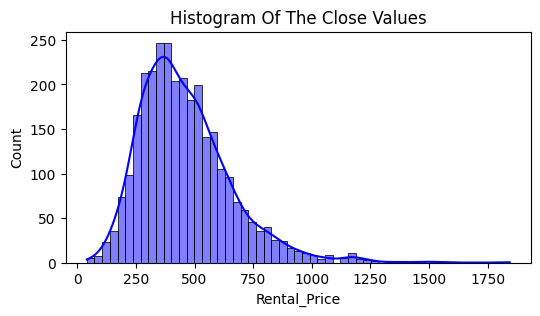

In [58]:
#Histogram of the target variable
plt.figure(figsize=(6,3))
sbn.histplot(data = dts, x = 'Rental_Price', color = 'blue', kde = True)
plt.title("Histogram Of The Close Values")
plt.show()

In [59]:
# Correlation between variables
dts.corr()

,Rental_Price,Area_m2,Year_of_construction,Localization_Code,Number_of_bathrooms,Number_of_Kitchens,Region_Code
Rental_Price,1.000000,0.584878,0.139194,0.172368,0.250261,0.170707,-0.020846
Area_m2,0.584878,1.000000,-0.226581,0.110046,0.226306,0.045716,-0.089050
Year_of_construction,0.139194,-0.226581,1.000000,-0.152206,0.065824,0.109881,0.327983
Localization_Code,0.172368,0.110046,-0.152206,1.000000,0.037858,-0.004774,-0.282528
Number_of_bathrooms,0.250261,0.226306,0.065824,0.037858,1.000000,0.064216,0.043600
Number_of_Kitchens,0.170707,0.045716,0.109881,-0.004774,0.064216,1.000000,0.029495
Region_Code,-0.020846,-0.089050,0.327983,-0.282528,0.043600,0.029495,1.000000


<Axes: xlabel='Area_m2', ylabel='Rental_Price'>

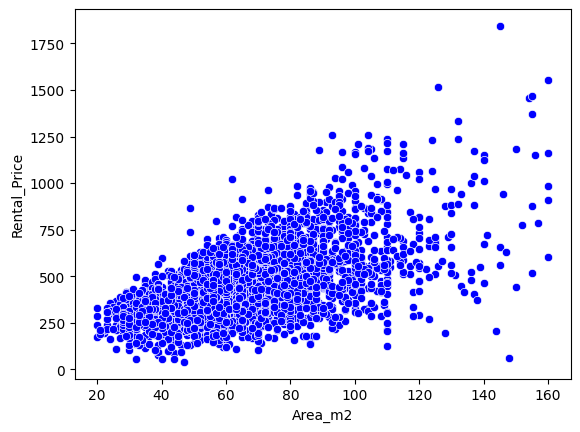

In [66]:
# Analyze the relationship between input variable Area_m2 and target variable Rental_Price
sbn.scatterplot(data = dts, x = 'Area_m2', y = 'Rental_Price', c = 'blue')

### Linear Regression

#### Build the OLS (Ordinary Least Squares) Model with Statsmodels in Python


In [83]:
dts.head()

,Rental_Price,Area_m2,Year_of_construction,Localization_Code,Number_of_bathrooms,Number_of_Kitchens,Region_Code
0,120.97436,35,1939,1,0,0,1112
1,436.97433,104,1939,1,1,0,1112
2,355.74360,29,1971,2,0,0,2114
3,282.92310,39,1972,2,0,0,2148
4,807.23080,97,1985,1,0,0,2222


In [86]:
# Define the dependent variable
y = dts['Rental_Price']

In [87]:
# Define the independent variable
X = dts['Area_m2']

#### Determine the constant

To determine the constant, we will use the sms.OLS(y,X) method, which is a function from the Statsmodels package, a Python library used for statistical analysis. The OLS (Ordinary Least Squares) function is used to fit a linear regression model by minimizing the sum of the squared errors between the observed values and the values predicted by the model.

Where:
y: An array or pandas Series representing the dependent variable
X: An array or pandas DataFrame representing the independent variables

In [89]:
# Adding a constante to the independent variable
X = sms.add_constant(X)

In [91]:
#Create the model
model = sms.OLS(y,X)

In [92]:
#Model Training
result = model.fit()

In [95]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           Rental_Price   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     1559.
Date:                Mon, 04 Aug 2025   Prob (F-statistic):          6.84e-275
Time:                        19:32:11   Log-Likelihood:                -19461.
No. Observations:                3000   AIC:                         3.893e+04
Df Residuals:                    2998   BIC:                         3.894e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        133.6988      8.750     15.279      0.0

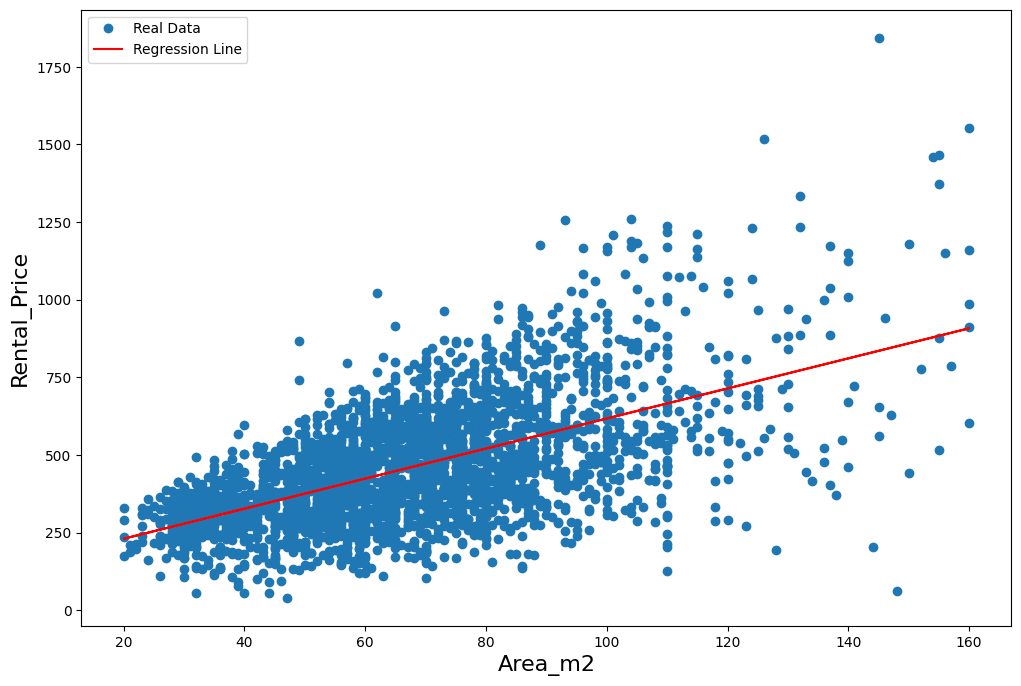

In [97]:
#Pot
plt.figure(figsize =(12,8))
plt.xlabel('Area_m2', size = 16)
plt.ylabel('Rental_Price', size = 16)
plt.plot(X['Area_m2'], y, 'o', label = 'Real Data')
plt.plot(X['Area_m2'], result.fittedvalues, "r-", label = 'Regression Line')
plt.legend(loc = 'best')
plt.show()

## Conclusion

There is an excellent relationship between property area (m²) and rental price. However, property area alone is not sufficient to explain rental price variation, as our model only obtained a coefficient of determination (R²) of 0.34.

Ideally, more input variables would be used to build the model to understand whether other factors influence rental value.